# 常用机器学习实践技巧


https://zhuanlan.zhihu.com/p/50444108

- 数据预览
- 数据可视化
- 查找最优模型
- Pipeline的使用
- 模型调节

In [11]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

X = sns.load_dataset("iris")

### 数据预览

In [12]:
X.head(n=10)
X.sample(n=10) # randomly show samples

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica
2,4.7,3.2,1.3,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa
67,5.8,2.7,4.1,1.0,versicolor
41,4.5,2.3,1.3,0.3,setosa
63,6.1,2.9,4.7,1.4,versicolor
127,6.1,3.0,4.9,1.8,virginica
146,6.3,2.5,5.0,1.9,virginica
138,6.0,3.0,4.8,1.8,virginica


In [13]:
X.shape
X.dtypes
X.describe()

(150, 5)

### 数据可视化


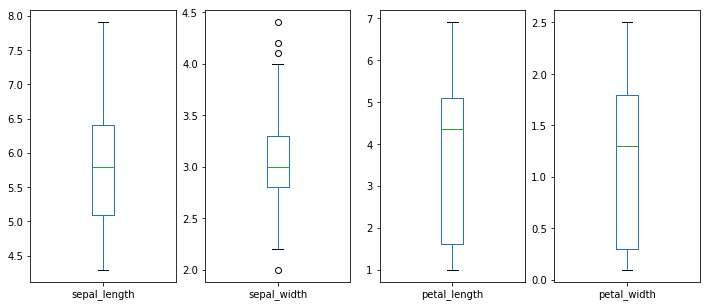

In [15]:
X.plot(kind="box",subplots=True,layout=(1,4),figsize=(12,5))
plt.show()

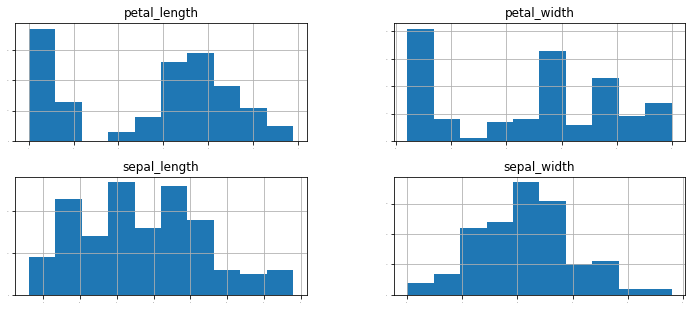

In [16]:
X.hist(figsize=(12,5),xlabelsize=1,ylabelsize=1)
plt.show()

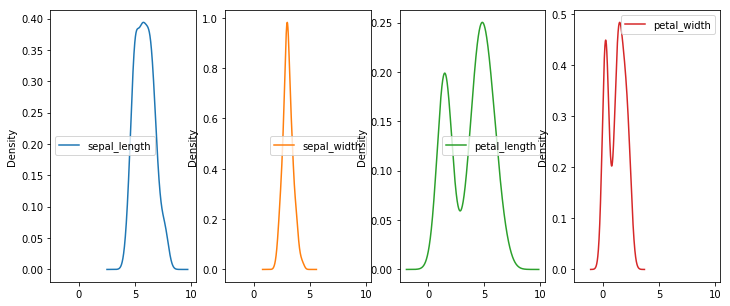

In [17]:
X.plot(kind="density",subplots=True,layout=(1,4),figsize=(12,5))
plt.show()

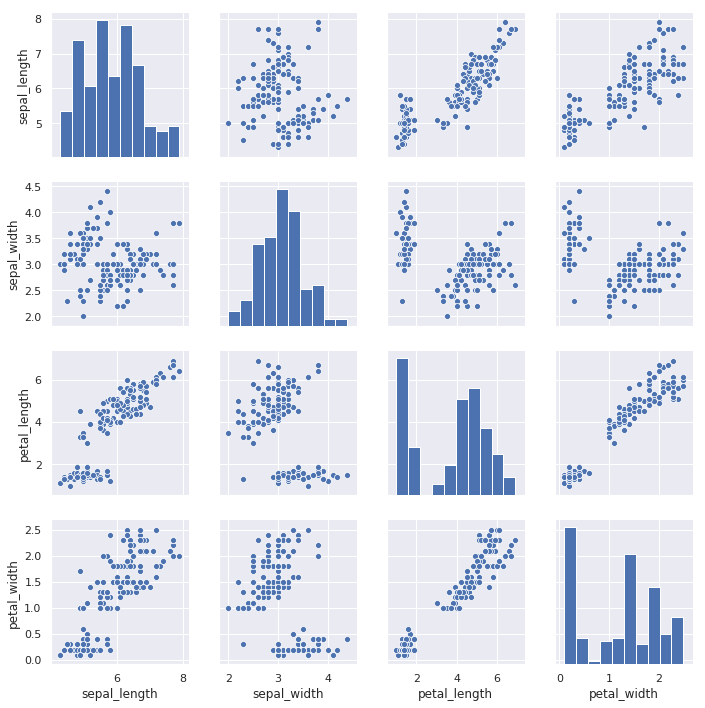

In [32]:
sns.pairplot(iris)

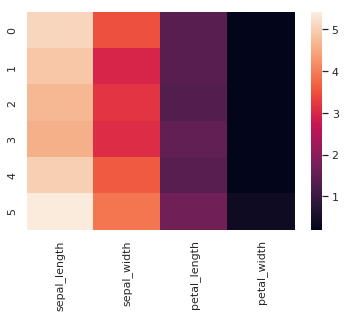

In [31]:
sns.set()
sns.heatmap( X.loc[0:5,'sepal_length':'petal_width'] )

### 查找最优模型


In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


models = []
models.append(("AB",AdaBoostClassifier()))
models.append(("GBM",GradientBoostingClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("ET",ExtraTreesClassifier()))
models.append(("SVC",SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("LDA",LinearDiscriminantAnalysis()))

names = []
results = []

for name,model in models:
    kfold = KFold(n_splits=5,random_state=42)
    result = cross_val_score(model,X,y,scoring="accuracy",cv=kfold)
    names.append(name)
    results.append(result)
    print("{}  Mean:{:.4f}(Std{:.4f})".format(name,result.mean(),result.std()))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'setosa'